# Wine

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

# PCA

## Importing PCA Library

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv("/content/wine.csv")

In [4]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# EDA

In [5]:
wine.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [6]:
wine.shape

(178, 14)

In [7]:
wine.isna()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
wine.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [9]:
print(wine.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

### Considering only usefull data

In [10]:
wine.data = wine.iloc[:,1:]

<ipython-input-10-801fe5986366>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.data = wine.iloc[:,1:]


In [11]:
wine.data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Converting into numpy array

In [12]:
wine1=wine.data.values

In [13]:
wine1

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

### Normalizing the numerical data

In [14]:
wine_normal=scale(wine1)

In [15]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [16]:
wine_normal.shape

(178, 13)

#### Transforming data

In [17]:
pca=PCA()
pca_values=pca.fit_transform(wine_normal)

In [18]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [19]:
pca = PCA(n_components = 13) # n_component = no. of columns with high variance
pca_values = pca.fit_transform(wine_normal)

In [20]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

### The amount of variance that each PCA explains is

In [21]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

variance of 1st column of PCA is 0.36198848 i.e 36% ,and so on

### Cumulative variance

In [22]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [23]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

### Variance plot for PCA components obtained Scree plot

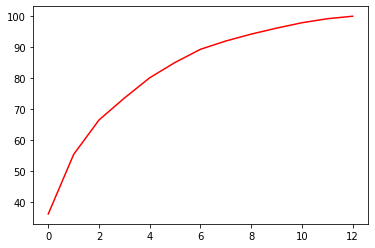

In [24]:
plt.plot(var1,color="red")

In [25]:
pca_values[:,0:2]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

### Plot between PCA1 and PCA2

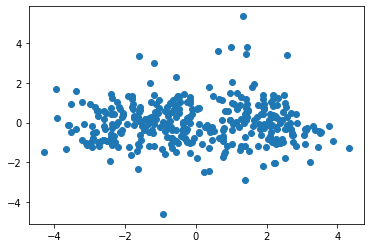

In [26]:
x = pca_values[:,0:2]
y = pca_values[:,2:4]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [27]:
final_df=pd.concat([wine['Type'],pd.DataFrame(pca_values[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)

In [28]:
final_df

,Type,PC1,PC2,PC3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570
174,3,-2.601956,-1.757229,0.207581
175,3,-2.677839,-2.760899,-0.940942
176,3,-2.387017,-2.297347,-0.550696


# Hierarchical_Clustering

### Importing hierarchical clustering libraries

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [31]:
wine.data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Normalization function

In [32]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [33]:
# Normalized data frame (considering the numerical part of data)# droping clg names
df_norm=norm_func(wine.iloc[:,1: ]) 

In [34]:
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


### Create Dendrogram

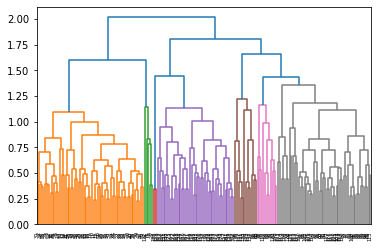

In [35]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

### Creating clusters

In [36]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [37]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

## Save clusters for chart

In [38]:
#clusters=pd.DataFrame(y_hc,columns=['Clusters])
y_hc=hc.fit_predict(df_norm)

In [39]:
y_hc

array([4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [40]:
wine.data['h_clusterid']=y_hc

In [41]:
y_hc

array([4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [42]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
wine.data1=wine.data.sort_values("h_clusterid") #by default will arange in ascending order

<ipython-input-43-6d2d79c043ce>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.data1=wine.data.sort_values("h_clusterid") #by default will arange in ascending order


In [44]:
wine.data1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,0
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480,0
150,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500,0
149,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550,0
148,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990,4
31,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515,4
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,4
28,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915,4


In [45]:
wine.data1.iloc[:,[0,-1]]

,Alcohol,h_clusterid
177,14.13,0
151,12.79,0
150,13.50,0
149,13.08,0
148,13.32,0
...,...,...
32,13.68,4
31,13.58,4
30,13.73,4
28,13.87,4


In [46]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# K-Means Clustering

### Import Libraries

In [47]:
from sklearn.cluster import KMeans

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
wine.data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


## Standardisation function

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
# Standardisation function 
from sklearn.preprocessing import StandardScaler # for z-scores
scaler = StandardScaler()
scaled_wine_df = scaler.fit_transform(wine.data)

In [52]:
scaled_wine_df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893,  1.30269025],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152,  1.30269025],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818,  1.30269025],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537, -1.15756296],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784, -1.15756296],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041, -1.15756296]])

In [53]:
kmeans = KMeans(n_clusters=4,random_state=0)
# randomely assinged centroids iterate untill it finds best centroids position and create cluster

In [54]:
predict=kmeans.fit_predict(scaled_wine_df)
# it will predict the kmeans that we have got for best centroid position cluster

In [55]:
predict # will give what cluster will data points belong to

array([3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [56]:
kmeans.inertia_   # Inertia measures how well a dataset was clustered by K-Means

1209.81183899102

we have number of cluster = 4 and inertia of that is 1209.81183899102

so to find out best cluster we will cheak inertia with no. of cluster from 1 to 10 and name it as wcss

In [57]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_wine_df)
    wcss.append(kmeans.inertia_)

## Elbow method

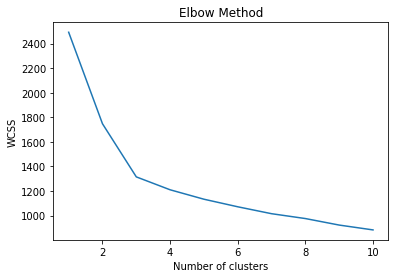

In [58]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

from the elbow method-at the point where the graph goes down very rapidely then that no. is not good.

in the above graph after point 3 we got graph line good

In [59]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_wine_df)

KMeans(n_clusters=3, random_state=42)

In [60]:
dir(clusters_new)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'predict',
 'random_

### Assign clusters to the data set

In [61]:
wine.data['clusterid_new'] = clusters_new.labels_

### These are standardized values.

In [62]:
clusters_new.cluster_centers_

array([[ 0.17711479,  0.90650664,  0.21596904,  0.55103983, -0.07734512,
        -0.99010047, -1.22711807,  0.71348704, -0.76127859,  0.95438352,
        -1.19006316, -1.28939841, -0.39632062, -0.89923637],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529,  1.19356612],
       [-0.91878983, -0.40135048, -0.50621556,  0.15575559, -0.48398675,
        -0.0815105 ,  0.01107713, -0.01249687,  0.0316085 , -0.88371381,
         0.45630563,  0.24479697, -0.75674934, -0.4399891 ]])

In [63]:
wine.data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,13.144000,3.346200,2.42560,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000,0.420000
1,1,13.676774,1.997903,2.46629,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,3.822581
2,2,12.256818,1.889242,2.22803,20.013636,92.848485,2.244242,2.040303,0.360303,1.608939,3.015152,1.061455,2.785000,509.257576,1.166667


In [64]:
wine.data[wine.data['clusterid_new']==2]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clusterid_new
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,3,2
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,3,2
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,3,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,1,2
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,1,2
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,1,2
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,1,2
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,1,2


In [65]:
wine.data[wine.data['clusterid_new']==0]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clusterid_new
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.84,2.01,515,0,0
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.70,2.12,372,0,0
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,3,0
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,3,0
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,3,0
133,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,3,0
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,3,0
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,3,0
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,0,0
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.000000,0.82,1.69,515,0,0
